In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

%load_ext autoreload
%autoreload 2

In [3]:
df = pd.read_csv("../data/FAPAN204.csv")

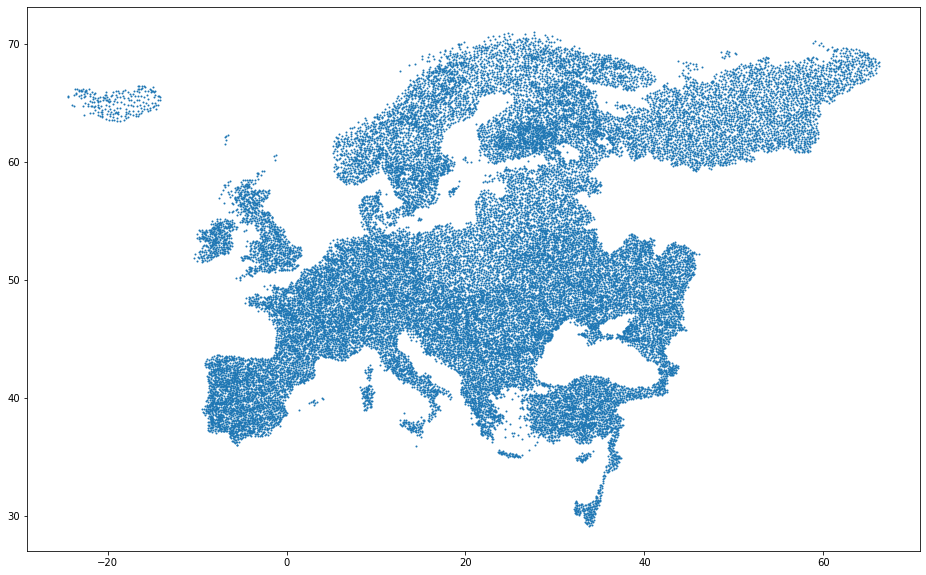

In [4]:
plt.figure(figsize=(16,10))
plt.scatter(df['x'], df['y'], s=1)

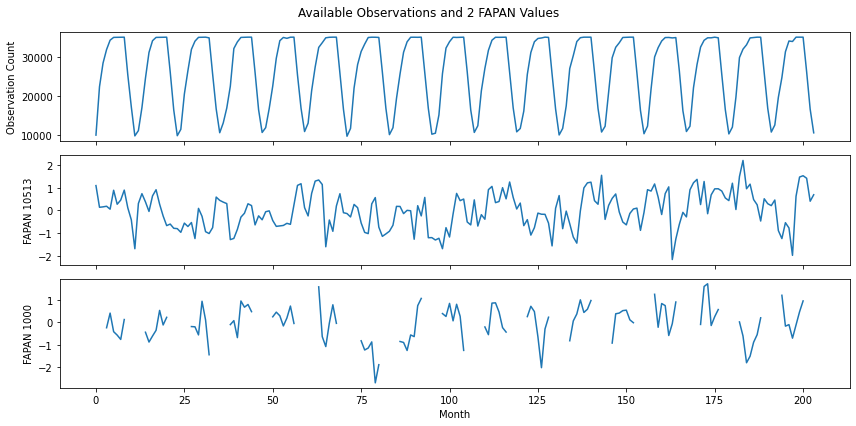

In [5]:
df_noNaN = df.iloc[:,3:].notna().sum(axis=0)
x = np.arange(len(df_noNaN))

fig, axs = plt.subplots(3, figsize=(12, 6), sharex=True)
fig.suptitle('Available Observations and 2 FAPAN Values')

axs[0].plot(x, df_noNaN)
axs[0].set_ylabel('Observation Count')

axs[1].plot(x, df.iloc[10513, 3:])
axs[1].set_ylabel('FAPAN 10513')

axs[2].plot(x, df.iloc[1000, 3:])
axs[2].set_ylabel('FAPAN 1000')
axs[2].set_xlabel('Month')

# Hide x labels for the top and middle plots
for ax in axs[:2]:
    ax.label_outer()

plt.tight_layout()
plt.show()

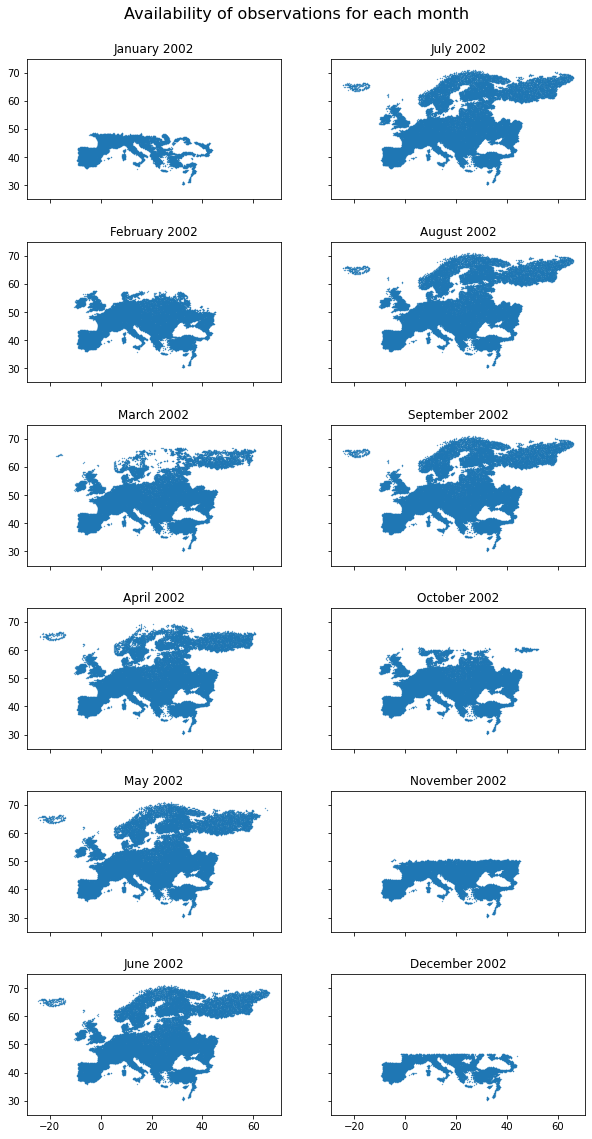

In [6]:
fig, axs = plt.subplots(6, 2, figsize=(10, 18), sharex=True, sharey=True, gridspec_kw={'hspace': 0.3})
fig.suptitle('Availability of observations for each month', fontsize=16)

k = 1
for j in range(2):
    for i in range(6):
        filtered_df = df.dropna(subset=[str(k)])
        axs[i][j].scatter(filtered_df['x'], filtered_df['y'], s=0.1)
        axs[i][j].set_ylim(25, 75)
        #axs[i][j].set_xlabel('X Coordinate')
        #axs[i][j].set_ylabel('Y Coordinate')
        
        # Calculate the year and adjusted month
        year = 2002 + (k - 1) // 12  # Year starts from 2002
        month = (k - 1) % 12 + 1  # Adjusted month

        # Get the month name from the adjusted month
        month_name = calendar.month_name[month]
        axs[i][j].set_title(f'{month_name} {year}', fontsize=12)
        k += 1

plt.subplots_adjust(top=0.94)

plt.show()

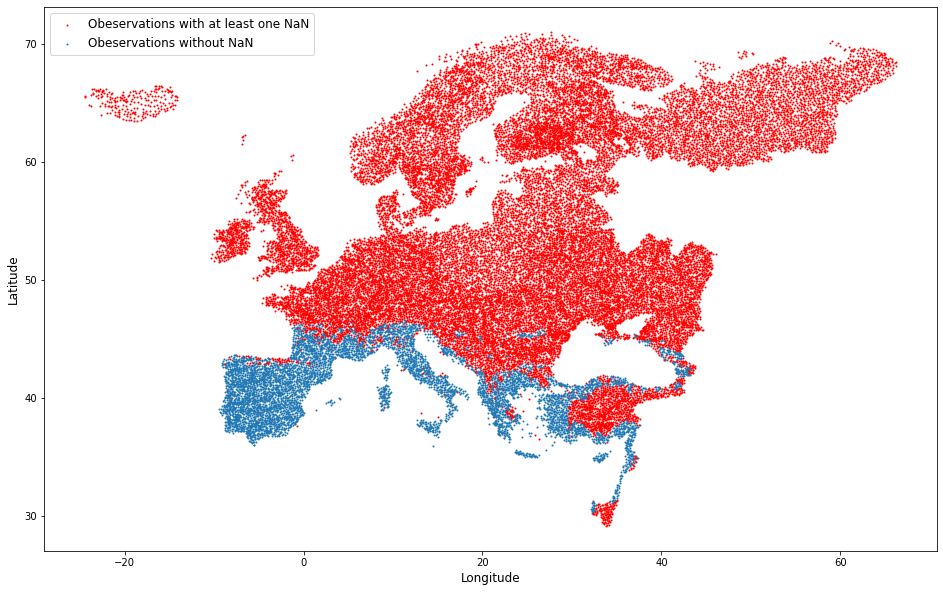

In [7]:
df_no_nan = df.dropna()
df_yes_nan = df[df.isnull().any(axis=1)]
plt.figure(figsize=(16,10))
plt.scatter(df_yes_nan['x'], df_yes_nan['y'], s=1, c='r', label='Obeservations with at least one NaN')
plt.scatter(df_no_nan['x'], df_no_nan['y'], s=1, label='Obeservations without NaN')
plt.legend(fontsize='large')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
#plt.xlim(-10, 50)  
#plt.ylim(30, 47.5)
plt.show()

In [74]:
def select_columns_by_months(dataframe, selected_months):
    selected_columns = []

    selected_months = np.array(selected_months)

    for i in range((dataframe.shape[1] - 3) // 12):
        selected_columns.extend(selected_months + i * 12)

    all_columns = np.arange(1, dataframe.shape[1] - 2)
    columns_to_drop = np.setdiff1d(all_columns, np.array(selected_columns))
    columns_to_drop = [str(i) for i in columns_to_drop]

    filtered_dataframe = dataframe.drop(columns=columns_to_drop, axis=1)

    return filtered_dataframe

In [98]:
df_months = select_columns_by_months(df, [1])
df_months

,subID,x,y,1,13,25,37,49,61,73,85,97,109,121,133,145,157,169,181,193
0,8801544,-22.5854,65.7710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8801548,-24.4720,65.5149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8000005,9.3096,59.1909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8115258,8.7466,59.1359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8115717,9.2398,58.9271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35403,9566395,0.1158,49.3175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35404,9581818,-5.0342,55.7842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35405,9524166,-1.0625,45.5008,0.383167,0.934667,0.366333,-0.072833,0.201500,0.227833,-1.370167,-0.246833,-1.190667,0.456833,-0.270167,-1.517833,0.240167,0.472000,1.389333,-0.434333,-1.382500
35406,9581815,-5.1042,56.0083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
nan_list = []
for i in range(1, 13):
    df_by_months = select_columns_by_months(df, [i])
    df_no_nan = df_by_months.dropna(how='any')

    nan_list.append(len(df_no_nan))

In [103]:
nan_list

[7556,
 10636,
 15258,
 27391,
 32069,
 33456,
 34290,
 34770,
 34634,
 24303,
 13609,
 7847]

In [104]:
df_august = select_columns_by_months(df, [8])
df_no_nan = df_august.dropna(how='any')

In [106]:
df_no_nan.to_csv("../data/FAPAN_august_no_nan", index=False)